Problem Understanding 

Blood donation is a critical healthcare requirement. This project aims to predict whether a donor will donate blood again when the mobile blood donation vehicle revisits the campus. Using historical donation data, a machine learning model is built to identify repeat donors, helping blood banks plan campaigns efficiently.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



In [2]:
df = pd.read_csv("Blood_donation.csv")


In [3]:
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [4]:
df.shape


(576, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [6]:
df.columns = [
    'id',
    'months_since_last',
    'num_donations',
    'total_volume',
    'months_since_first',
    'donated_march_2007'
]


In [7]:
df.drop('id', axis=1, inplace=True)


In [8]:
df.head()

,months_since_last,num_donations,total_volume,months_since_first,donated_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [9]:
df.describe()


,months_since_last,num_donations,total_volume,months_since_first,donated_march_2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


Observation:

The dataset contains numerical features with varying ranges, indicating the need for feature scaling during preprocessing.

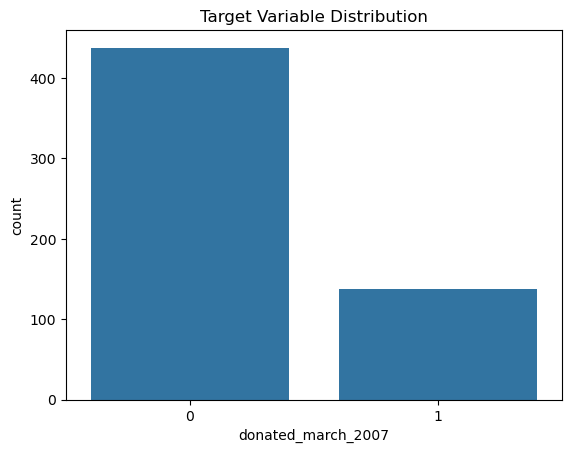

In [10]:
sns.countplot(x='donated_march_2007', data=df)
plt.title("Target Variable Distribution")
plt.show()


Observation:

The dataset shows a slight class imbalance, with fewer donors donating blood in March 2007 compared to non-donors.

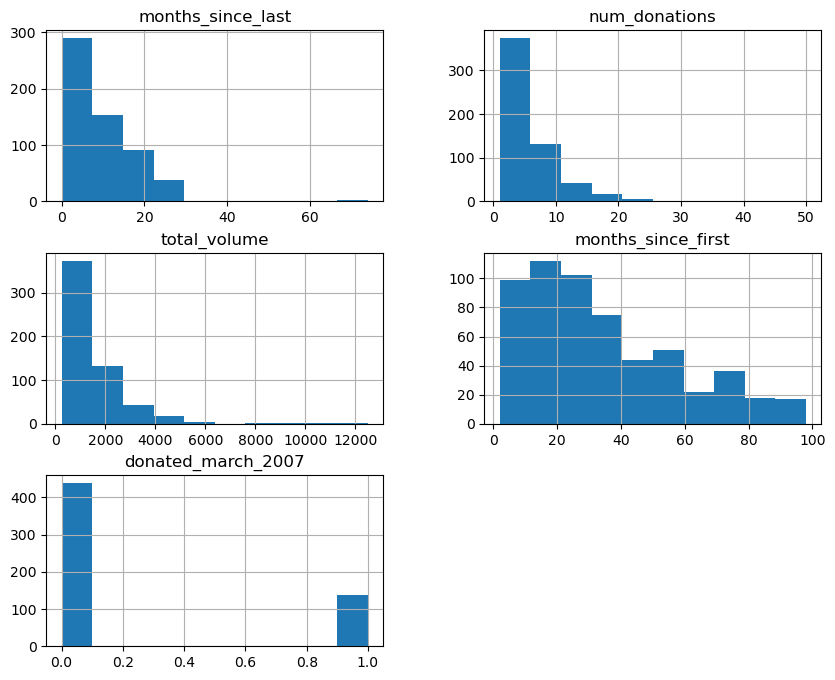

In [11]:
df.hist(figsize=(10,8))
plt.show()


Observation:

Several features show right-skewed distributions, indicating the presence of outliers

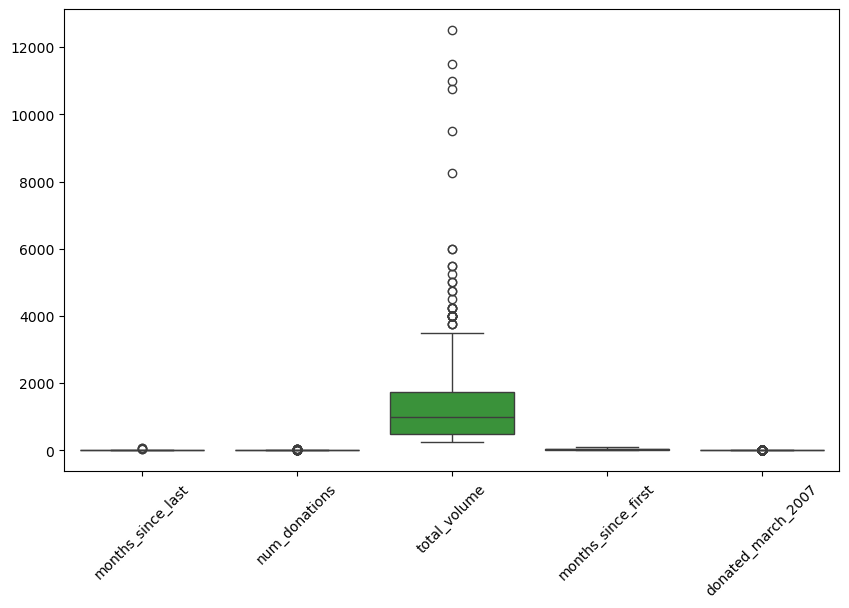

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


Observation:

Outliers are present in donation frequency and blood volume features, which may affect model performance.

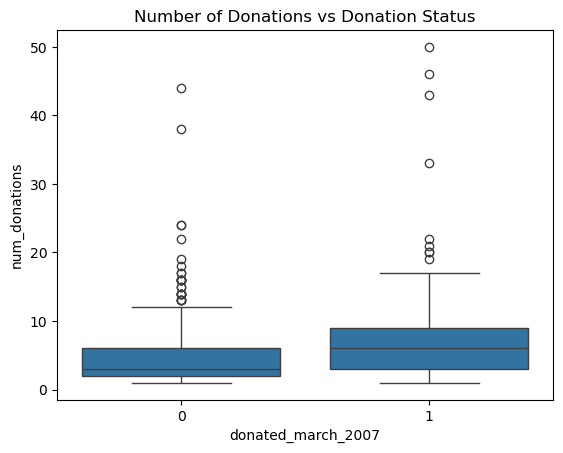

In [13]:
sns.boxplot(x='donated_march_2007', y='num_donations', data=df)
plt.title("Number of Donations vs Donation Status")
plt.show()


Observation:

Donors who donated in March 2007 generally have a higher number of past donations.

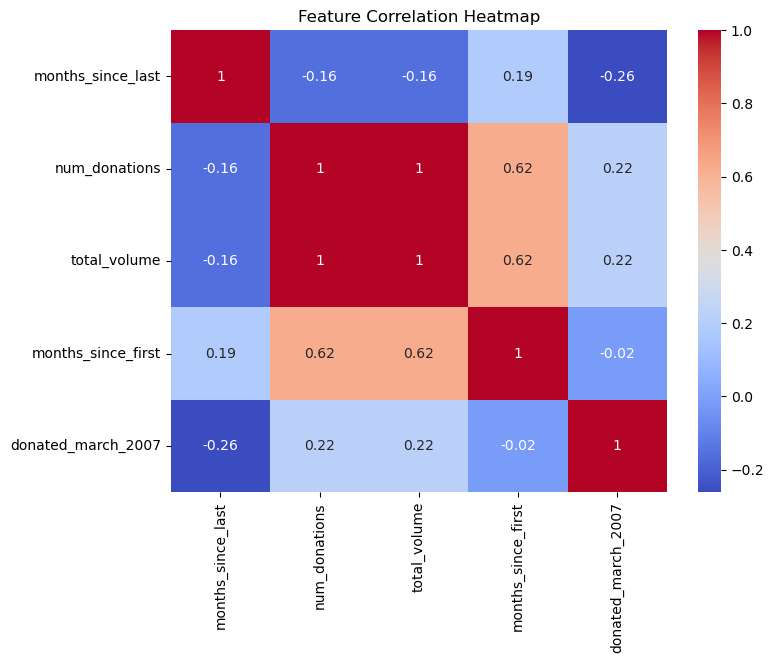

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Observation:

Total blood volume is highly correlated with the number of donations, which is expected since frequent donors donate more blood.

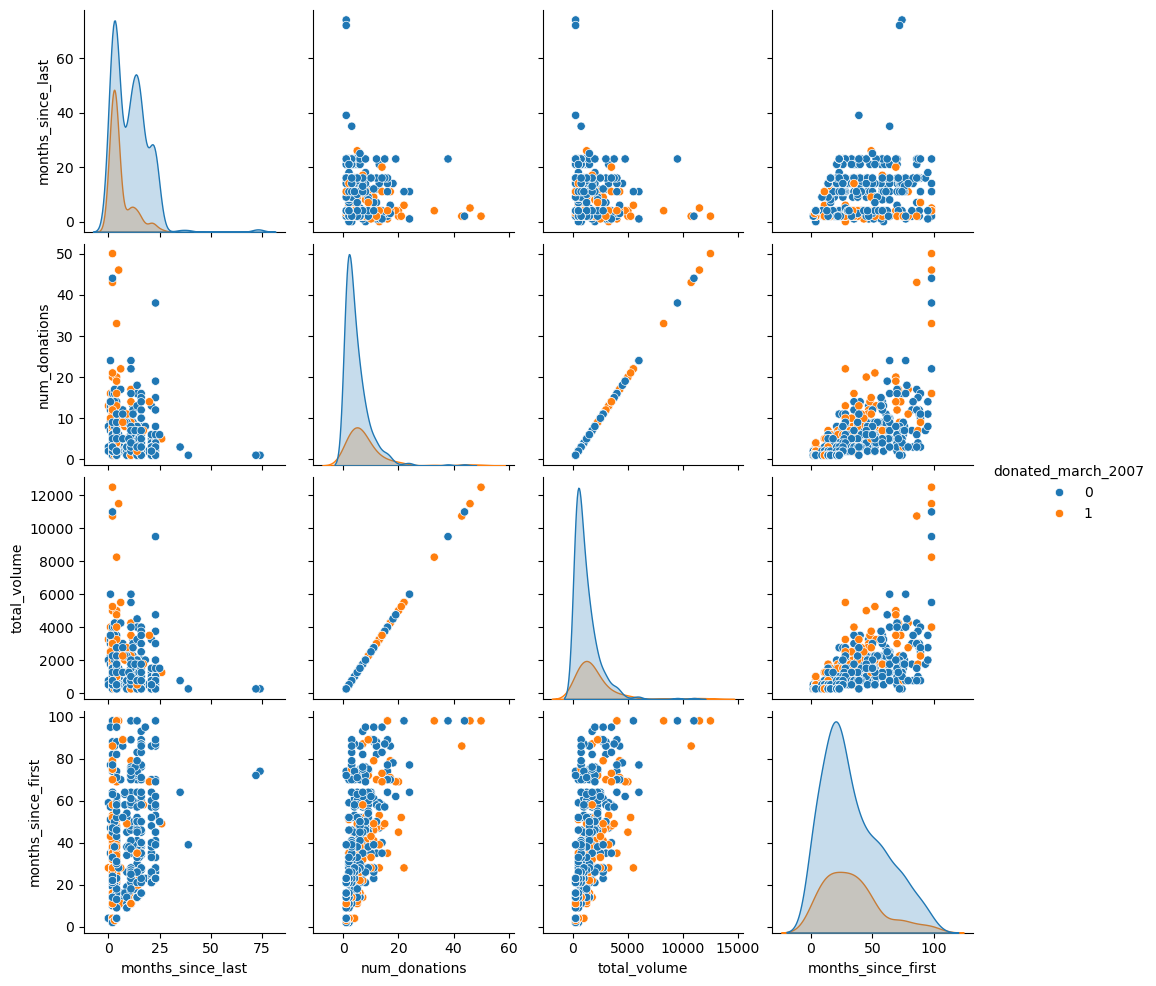

In [15]:
sns.pairplot(df, hue='donated_march_2007')
plt.show()


Observation:

Clear separation is visible for donation-related features, indicating their usefulness in prediction.

In [16]:
X = df.drop('donated_march_2007', axis=1)
y = df['donated_march_2007']


In [17]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1


In [18]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [19]:
X = X.clip(lower=lower_bound, upper=upper_bound, axis=1)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [23]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}


In [24]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })


In [25]:

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.767241,0.555556,0.178571,0.270270
1,Decision Tree,0.672414,0.333333,0.357143,0.344828
2,Random Forest,0.758621,0.500000,0.428571,0.461538
3,KNN,0.741379,0.428571,0.214286,0.285714
4,SVM,0.775862,0.600000,0.214286,0.315789
5,Naive Bayes,0.758621,0.500000,0.357143,0.416667


The models achieved moderate accuracy but relatively lower recall due to class imbalance in the dataset. Among all models, Random Forest performed best in terms of F1-score and recall, making it more suitable for identifying repeat blood donors.

In [26]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}


In [27]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)


In [28]:
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [29]:
best_rf = grid_search.best_estimator_
grid_search.best_params_


{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}

In [30]:
y_pred_rf = best_rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)


Observation :

After hyperparameter tuning, Random Forest showed improved balance between precision and recall, confirming its suitability as the final model for predicting repeat blood donation.

OBSERVATION

Hyperparameter tuning using GridSearchCV was applied to the Random Forest model to improve its generalization performance. The tuned model showed a more balanced trade-off between precision and recall and was selected as the final model.

In [31]:
y_pred = best_rf.predict(X_test_scaled)


In [32]:
accuracy_score(y_test, y_pred)


0.7844827586206896

In [33]:
precision_score(y_test, y_pred)


0.5789473684210527

In [34]:
recall_score(y_test, y_pred)


0.39285714285714285

In [35]:
f1_score(y_test, y_pred)


0.46808510638297873

In [36]:
from sklearn.metrics import classification_report


In [37]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.91      0.86        88
           1       0.58      0.39      0.47        28

    accuracy                           0.78       116
   macro avg       0.70      0.65      0.67       116
weighted avg       0.77      0.78      0.77       116



In [38]:
confusion_matrix(y_test, y_pred)


array([[80,  8],
       [17, 11]], dtype=int64)

In [39]:
import joblib



In [40]:
joblib.dump(best_rf, "blood_donation_model.pkl")


['blood_donation_model.pkl']

In [41]:
loaded_model = joblib.load("blood_donation_model.pkl")


Observation

The final tuned Random Forest model was evaluated using accuracy, precision, recall, F1-score, confusion matrix, and classification report. The model demonstrated balanced performance on unseen data and was saved using joblib for future use without retraining

Conclusion

In this project, a machine learning model was developed to predict whether a blood donor will donate again. After performing data exploration, preprocessing, and training multiple classification models, Random Forest emerged as the best-performing model. It provided a balanced performance across accuracy, precision, recall, and F1-score, making it suitable for this imbalanced dataset.

WHY RANDOM FOREST WORKED BEST 


Random Forest performed better because it combines multiple decision trees, reduces overfitting, and can handle non-linear relationships and imbalanced data effectively.

LIMITATIONS OF THE PROJECT


.The dataset is relatively small, which limits model generalization.

.Class imbalance affects recall for the minority class.

.Outlier handling was limited to basic techniques.